 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2013]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf 
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2014]:
# Reading whale returns
csvpath = Path("../Starter_Code/Resources/whale_returns.csv")
whale_r_data = pd.read_csv(csvpath,parse_dates=True, index_col="Date", infer_datetime_format=True)

whale_r_data.sort_index(axis=0,ascending=True)

whale_r_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [2015]:
# Count nulls
whale_r_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [2016]:
# Drop nulls
whale_r_data = whale_r_data.dropna()

#Verify nulls are dropped
whale_r_data.isnull().sum()    

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [2017]:
# Reading algorithmic returns
csvpath = Path("../Starter_Code/Resources/algo_returns.csv")

algo_r_data = pd.read_csv(csvpath,parse_dates=True, index_col="Date", infer_datetime_format=True)

algo_r_data.sort_index(axis=0,ascending=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [2018]:
# Count nulls
algo_r_data.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [2019]:
# Drop nulls
algo_r_data = algo_r_data.dropna()

#Verify nulls are dropped

algo_r_data.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [2020]:
# Reading S&P 500 Closing Prices

csvpath = Path("../Starter_Code/Resources/sp500_history.csv")

sp500_r_data = pd.read_csv(csvpath,parse_dates=True, index_col="Date", infer_datetime_format=True)

#removing the dollar signs so that calculations can be made  
sp500_r_data['Close'] = sp500_r_data['Close'].str.replace("$", "")

#Sorting by the date in ascending order

sp500_r_data= sp500_r_data.sort_index(axis=0,ascending=True)

sp500_r_data.head()




C:\Users\GOKHAN\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [2021]:
# Check Data Types
sp500_r_data.dtypes

Close    object
dtype: object

In [2022]:
# Fix Data Types
sp500_r_data['Close'] = sp500_r_data['Close'].astype('float')

sp500_r_data['Close'].dtypes


dtype('float64')

In [2023]:
# Calculate Daily Returns

sp500_r_data= sp500_r_data.pct_change()

sp500_r_data.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [2024]:
# Drop nulls
sp500_r_data.dropna(inplace=True)
sp500_r_data


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [2025]:
# Rename `Close` Column to be specific to this portfolio.

sp500_r_data = sp500_r_data.rename(columns={'Close':'SP500'})
sp500_r_data.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [2026]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_return_data = pd.concat([whale_r_data,algo_r_data,sp500_r_data], axis="columns", join="inner")

combined_return_data.head()    #print the new df

combined_return_data.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

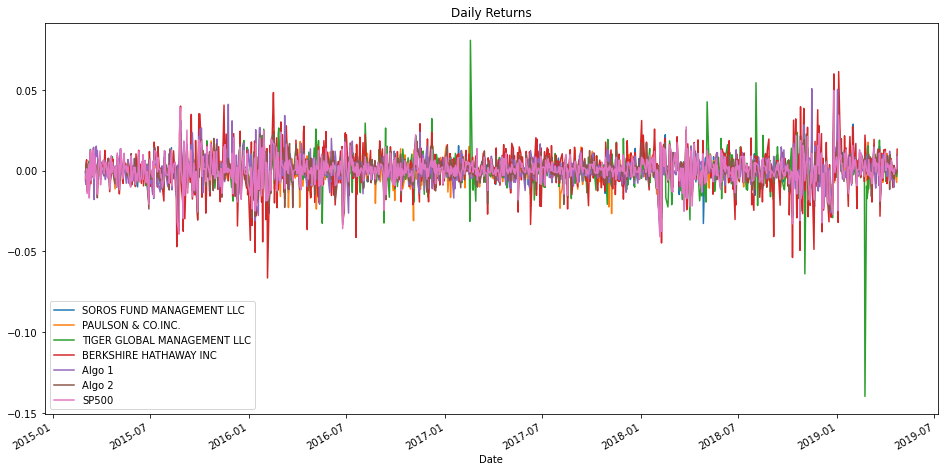

In [2027]:
# Plot daily returns of all portfolios
combined_return_data.plot(title="Daily Returns", figsize=(16,8))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

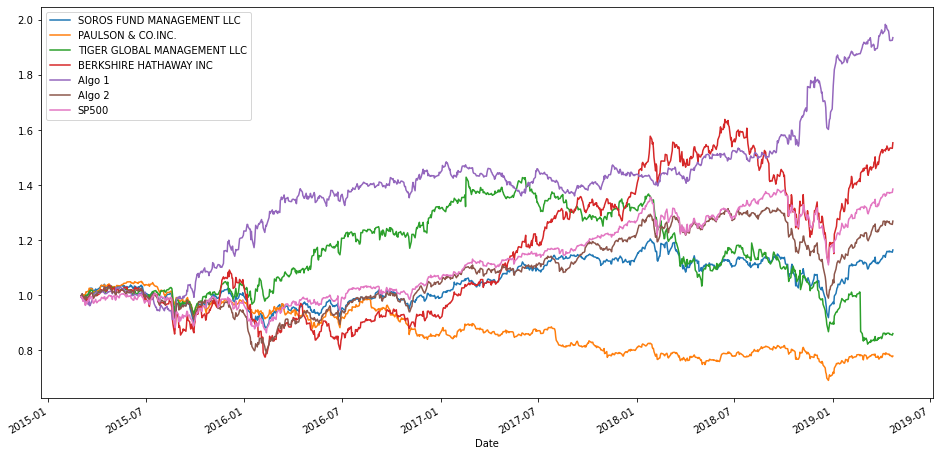

In [2028]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_return_data).cumprod()    #cumprod(pandas) calculates the cumulative product over a given axis. 

cumulative_returns.head()

# Plot cumulative returns

cumulative_returns.plot(figsize=(16,8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk'}>

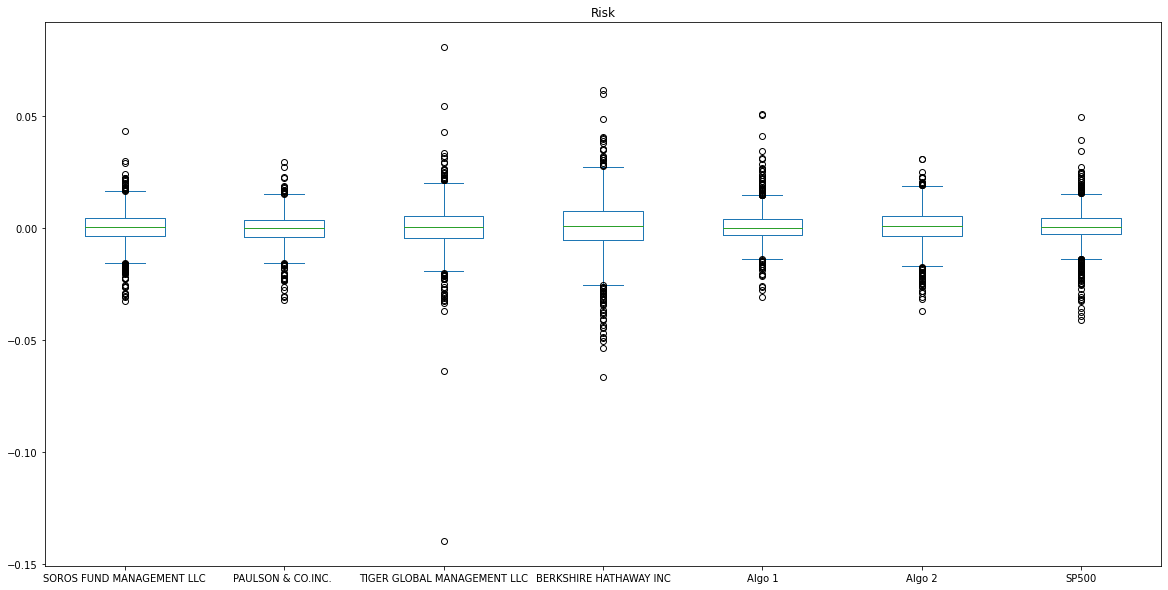

In [2029]:
# Box plot to visually show risk
combined_return_data.plot.box(title="Risk",figsize= (20,10))  



### Calculate Standard Deviations

In [2030]:
# Calculate the daily standard deviations of all portfolios -- and also sort them in descending order to find the riskiest asset and compare easily

daily_std_all = combined_return_data.std().sort_values(ascending=False)

print(daily_std_all)


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500                          0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [2031]:
# Calculate  the daily standard deviation of S&P 500

sp500_daily_std =sp500_r_data.std()
sp500_daily_std

# Determine which portfolios are riskier than the S&P 500
riskier_than_500 = [daily_std_all > daily_std_all['SP500']]
riskier_than_500

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 SP500                          False
 Algo 2                         False
 SOROS FUND MANAGEMENT LLC      False
 Algo 1                         False
 PAULSON & CO.INC.              False
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [2032]:
# Calculate the annualized standard deviation (252 trading days)
#the formula for astd is std* sqrt of the period, in this case days

annualized_std = daily_std_all*np.sqrt(252)

#sort descending order
annualized_std.sort_values(ascending=False)



BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500                          0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Standard Deviation (Rolling, 21 Day Window)'}, xlabel='Date'>

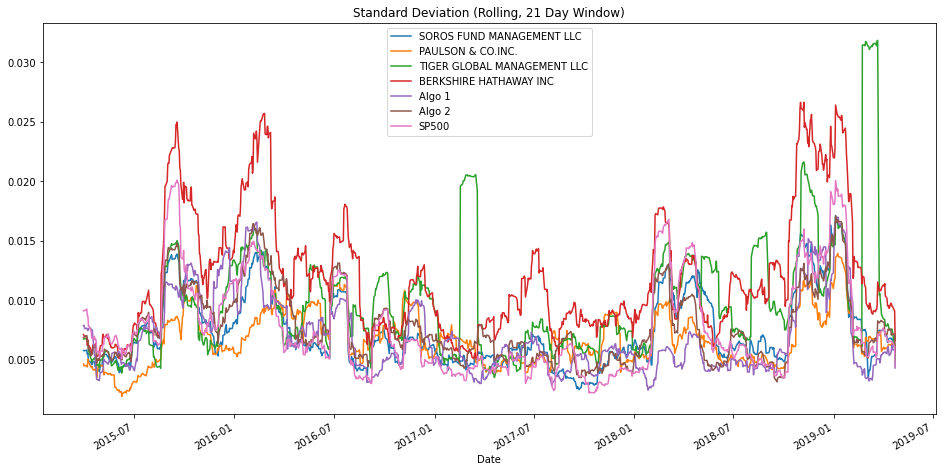

In [2033]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_standard_dev = combined_return_data.rolling(window=21).std()


# Plot the rolling standard deviation
rolling_standard_dev.plot(title= "Standard Deviation (Rolling, 21 Day Window)", figsize= (16,8))



### Calculate and plot the correlation

In [2034]:
# Calculate the correlation
correlation_table = combined_return_data.corr()


# Display de correlation matrix

correlation_table                                                                                               


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta'}, xlabel='Date'>

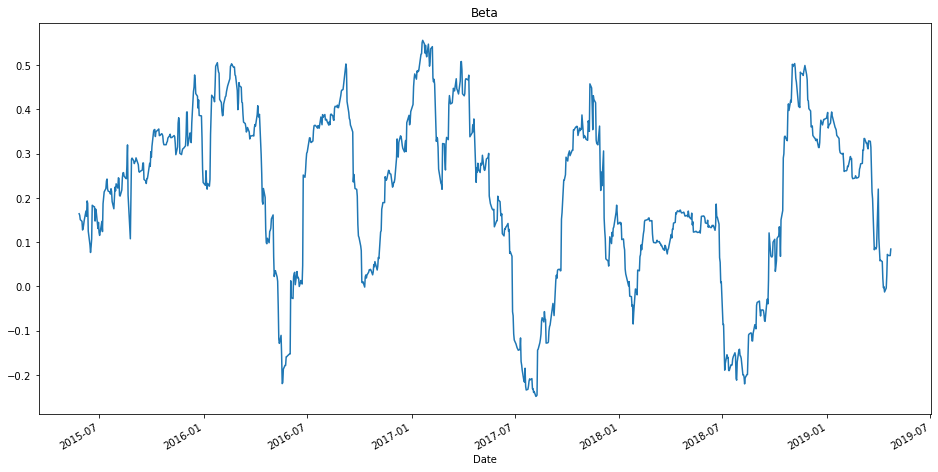

In [2035]:
# Calculate covariance of a single portfolio
Algo1_covariance = combined_return_data["Algo 1"].rolling(window=60).cov(combined_return_data["SP500"])   # 60 day window because we are comparing two months 

# Calculate variance of S&P 500
sp500_variance = combined_return_data["SP500"].rolling(window=60).var()


# Computing beta (I am assuming beta of any portfolio)

Algo1_beta = Algo1_covariance/sp500_variance 


# Plot beta trend
Algo1_beta.plot(title="Beta", figsize =(16, 8))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [2036]:
# Use `ewm` to calculate the rolling window

rolling_window_ewm_method = combined_return_data.ewm(halflife=21, adjust=True).std()

#rolling_window_ewm_method.plot(title="EWM Method", figsize = (16,8)) to see the actual chart


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [2037]:
# Annualized Sharpe Ratios
annualized_sharpe = (combined_return_data.mean()*252)/annualized_std    #annulized_std was calculated in previous parts

annualized_sharpe

Algo 1                         1.378648
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
PAULSON & CO.INC.             -0.483570
SOROS FUND MANAGEMENT LLC      0.356417
SP500                          0.648267
TIGER GLOBAL MANAGEMENT LLC   -0.121060
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

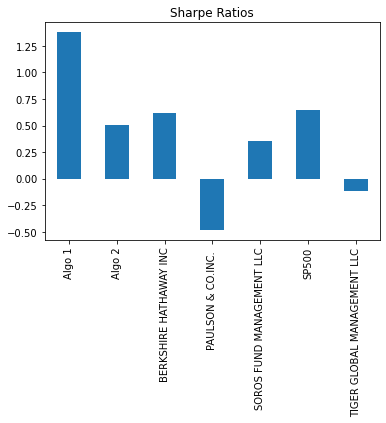

In [2038]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe.plot(kind ="bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Our algorithmic strategies have higher beta values than the S&P 500 and our whales' portfolios. Therefore, we can conclude that our algorithmic strategies outperformed the whales and SP500.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [2039]:
# Reading data from 1st stock
#apple_stock_csv = Path("../Starter_Code/Resources/Google_apple_stock_data.csv")

#apple_stock_data_df = pd.read_csv(apple_stock_csv, parse_dates=True, infer_datetime_format=True, skiprows=[i for i in range(1,26)]) #skip the header until there are actual values with skiprows.

#apple_stock_data_df

apple_stock = yf.Ticker("AAPL") #I commented out creating path and reading the csv parts because bcs support recommended I use yfinance function

# get stock info
apple_stock.info

# get historical market data
apple_stock_data_df = apple_stock.history(start="2015-03-03", end="2019-04-23")

apple_stock_data_df = apple_stock_data_df.drop(columns={"Dividends","Stock Splits","Open", "High", "Low","Volume"})

apple_stock_data_df = apple_stock_data_df.rename(columns={'Close':'AAPL'})

apple_stock_data_df

#drop unnamed column
#apple_stock_data_df=apple_stock_data_df.drop(columns=['Unnamed: 0'])

#get rid of the first row
#apple_stock_data_df_cleaned = apple_stock_data_df.loc[1:]

#rename each column
#apple_stock_data_df_cleaned= apple_stock_data_df_cleaned.rename(columns={
    #"Instructions\nEnter stock symbol in cell B4":"Date",
    #"Unnamed: 2":"Open", "Unnamed: 3":"High", "Unnamed: 4":"Low",
    #"Unnamed: 5":"Close", "POWERED BY": "Volume"
    
#})

#create date and close dataframes and grab the corresponding values. Then combine these two dfs into a new df 
#apple_returns_date = apple_stock_data_df_cleaned.loc[:, 'Date'] 

#apple_returns_date

#apple_returns_close = apple_stock_data_df_cleaned.loc[:, 'Close']

#apple_returns_close

#apple_returns_df = pd.concat([apple_returns_date, apple_returns_close], axis=1, join="outer")

#apple_returns_df



,AAPL
Date,
2015-03-03,29.357788
2015-03-04,29.171680
2015-03-05,28.688290
2015-03-06,28.731411
2015-03-09,28.853962
...,...
2019-04-15,48.497578
2019-04-16,48.502445
2019-04-17,49.446938


In [2040]:
# Reading data from 2nd stock
#nike_data_csv = Path("../Starter_Code/Resources/Google_Nike_data.csv")

#nike_stock_data_df = pd.read_csv(nike_data_csv, parse_dates=True, infer_datetime_format= True, skiprows=[i for i in range(1,26)])#skip the header until there are actual values with skiprows.

#drop unnamed column
#nike_stock_data_df = nike_stock_data_df.drop(columns=['Unnamed: 0'])

#get rid of the first row
#nike_stock_data_df_cleaned = nike_stock_data_df.loc[1:]

#rename each column
#nike_stock_data_df_cleaned= nike_stock_data_df_cleaned.rename(columns={
    #"Instructions\nEnter stock symbol in cell B4":"Date",
    #"Unnamed: 2":"Open", "Unnamed: 3":"High", "Unnamed: 4":"Low",
    #"Unnamed: 5":"Close", "POWERED BY": "Volume"
    
#})

#ike_returns_date = nike_stock_data_df_cleaned.loc[:, 'Date'] 

#nike_returns_date

#nike_returns_close = nike_stock_data_df_cleaned.loc[:, 'Close']

#nike_returns_close

#nike_returns_df = pd.concat([nike_returns_date, nike_returns_close], axis=1, join="outer")

nike_stock = yf.Ticker("NKE")

nike_stock_data_df = nike_stock.history(start="2015-03-03", end="2019-04-23")

nike_stock_data_df

nike_stock_data_df = nike_stock_data_df.drop(columns={"Dividends","Stock Splits","Open", "High", "Low","Volume"})

nike_stock_data_df = nike_stock_data_df.rename(columns={'Close':'NKE'})

nike_stock_data_df


,NKE
Date,
2015-03-03,45.498405
2015-03-04,45.289425
2015-03-05,45.725971
2015-03-06,45.006142
2015-03-09,45.247631
...,...
2019-04-15,84.498291
2019-04-16,85.442261
2019-04-17,86.347282


In [2041]:
# Reading data from 3rd stock
#tesla_stock_data_csv = Path("../Starter_Code/Resources/Google_Tesla_stock_data.csv")

#tesla_stock_data_df = pd.read_csv(tesla_stock_data_csv, parse_dates=True, infer_datetime_format=True, skiprows=[i for i in range(1,26)])#skip the header until there are actual values with skiprows.

#drop unnamed row
#tesla_stock_data_df=tesla_stock_data_df.drop(columns=['Unnamed: 0'])

#get rid of first row
#tesla_stock_data_df_cleaned = tesla_stock_data_df.loc[1:]

#rename each column
#tesla_stock_data_df_cleaned= tesla_stock_data_df_cleaned.rename(columns={
                            #"Instructions\nEnter stock symbol in cell B4": "Date","Unnamed: 2": "Open",
                            #"Unnamed: 3": "High", "Unnamed: 4":"Low", "Unnamed: 5": "Close",
                            #"POWERED BY":"Volume"
#})


#tesla_returns_date = tesla_stock_data_df_cleaned.loc[:, 'Date'] 

#tesla_returns_date

#tesla_returns_close = tesla_stock_data_df_cleaned.loc[:, 'Close']

#tesla_returns_close

#tesla_returns_df = pd.concat([tesla_returns_date, tesla_returns_close], axis=1, join="outer")

#tesla_returns_df

tesla_stock = yf.Ticker("TSLA")

tesla_stock_data_df = tesla_stock.history(start="2015-03-03", end="2019-04-23")

tesla_stock_data_df = tesla_stock_data_df.drop(columns={"Dividends","Stock Splits","Open", "High", "Low","Volume"})

tesla_stock_data_df = tesla_stock_data_df.rename(columns={'Close':'TSLA'})

tesla_stock_data_df



,TSLA
Date,
2015-03-03,39.911999
2015-03-04,40.487999
2015-03-05,40.125999
2015-03-06,38.776001
2015-03-09,38.175999
...,...
2019-04-15,53.276001
2019-04-16,54.672001
2019-04-17,54.245998


In [2042]:
# Combine all stocks in a single DataFrame
gokhan_portfolio_df = pd.concat([apple_stock_data_df, nike_stock_data_df, tesla_stock_data_df], axis= "columns", join="outer")

#gokhan_portfolio_df=gokhan_portfolio_df.T.drop_duplicates().T      #drop duplicates

# Reorganize portfolio data by having a column per symbol

#gokhan_portfolio_df.columns= ['DATE', 'AAPL', 'NKE', 'TSLA']       

#gokhan_portfolio_df['DATE']= pd.to_datetime(gokhan_portfolio_df['DATE'])

#gokhan_portfolio_df.set_index('DATE')

gokhan_portfolio_df.dtypes

AAPL    float64
NKE     float64
TSLA    float64
dtype: object

In [2043]:
# Calculate daily returns    #remove strings and convert everything to float to calculate pct_change

#gokhan_portfolio_df["TSLA"] = gokhan_portfolio_df["TSLA"].astype(str).str.replace(',', '').astype(float)

#gokhan_portfolio_df["AAPL"] = gokhan_portfolio_df["AAPL"].astype(str).str.replace(',', '').astype(float)

#gokhan_portfolio_df["NKE"] = gokhan_portfolio_df["NKE"].astype(str).str.replace(',', '').astype(float)

gokhan_portfolio_df[["AAPL", "NKE", "TSLA"]] = gokhan_portfolio_df[["AAPL", "NKE", "TSLA"]].pct_change() #calculate returns

#gokhan_portfolio_df
#gokhan_portfolio_df.dtypes
#gokhan_portfolio_df.columns

# Drop NAs
gokhan_portfolio_df = gokhan_portfolio_df.dropna()

#gokhan_portfolio_df.set_index("DATE", inplace=True) #this was giving me an error when I ran it after weights= .... , so I set the index once at the beginning 

# Display sample data
gokhan_portfolio_df



,AAPL,NKE,TSLA
Date,,,
2015-03-04,-0.006339,-0.004593,0.014432
2015-03-05,-0.016571,0.009639,-0.008941
2015-03-06,0.001503,-0.015742,-0.033644
2015-03-09,0.004265,0.005366,-0.015474
2015-03-10,-0.020686,-0.009443,-0.002934
...,...,...,...
2019-04-15,0.001810,0.006841,-0.004931
2019-04-16,0.000100,0.011171,0.026203
2019-04-17,0.019473,0.010592,-0.007792


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [2044]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

gokhan_weighted_returns = gokhan_portfolio_df.dot(weights)

# Display sample data

gokhan_weighted_returns





Date
2015-03-04    0.001166
2015-03-05   -0.005291
2015-03-06   -0.015961
2015-03-09   -0.001947
2015-03-10   -0.011021
                ...   
2019-04-15    0.001240
2019-04-16    0.012492
2019-04-17    0.007424
2019-04-18    0.005458
2019-04-22   -0.018601
Length: 1041, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [2045]:
# Join your returns DataFrame to the original returns DataFrame
combined_return_data_new = pd.concat([combined_return_data, gokhan_weighted_returns], axis="columns", join="inner")


combined_return_data_new = combined_return_data_new.rename(columns={0:"Gokhan's Portfolio"})

combined_return_data_new



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Gokhan's Portfolio
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.001166
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.005291
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.015961
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.001947
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961,-0.011021
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629,0.001240
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.012492
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.007424


In [2046]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

#combined_return_data_new =combined_return_data_new.apply (pd.to_numeric, errors='coerce')

#combined_return_data_new = combined_return_data_new.dropna()

#combined_return_data_new


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [2047]:
# Calculate the annualized `std`
new_all_daily_std = combined_return_data_new.std().sort_values(ascending=False) #I need to calculate the daily std because I added my custom portfolio

new_all_daily_std

new_annualized_std =new_all_daily_std*np.sqrt(252) 

new_all_daily_std


Gokhan's Portfolio             0.014539
BERKSHIRE HATHAWAY INC         0.012923
TIGER GLOBAL MANAGEMENT LLC    0.010903
SP500                          0.008557
Algo 2                         0.008345
SOROS FUND MANAGEMENT LLC      0.007900
Algo 1                         0.007626
PAULSON & CO.INC.              0.007027
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling STD'}, xlabel='Date'>

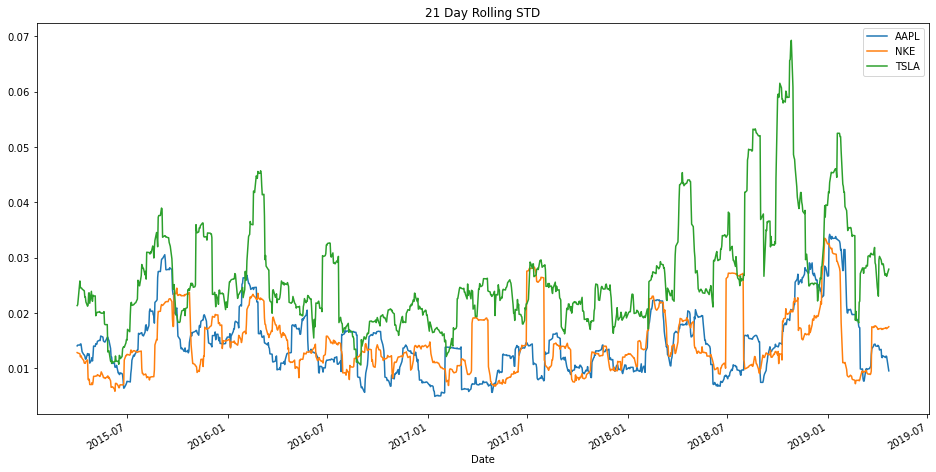

In [2048]:
# Calculate rolling standard deviation
gokhan_portfolio_rolling_std =gokhan_portfolio_df.rolling(window=21).std()

gokhan_portfolio_rolling_std =gokhan_portfolio_rolling_std.dropna()

gokhan_portfolio_rolling_std


# Plot rolling standard deviation

gokhan_portfolio_rolling_std.plot(title = "21 Day Rolling STD", figsize=(16, 8))

### Calculate and plot the correlation

In [2049]:
# Calculate and plot the correlation

new_correlation_table = combined_return_data_new.corr()

new_correlation_table

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Gokhan's Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.699870,0.561043,0.754182,0.320864,0.826726,0.837776,0.579674
PAULSON & CO.INC.,0.699870,1.000000,0.434380,0.545294,0.268483,0.678147,0.669517,0.438652
TIGER GLOBAL MANAGEMENT LLC,0.561043,0.434380,1.000000,0.424166,0.164111,0.507161,0.623853,0.420185
BERKSHIRE HATHAWAY INC,0.754182,0.545294,0.424166,1.000000,0.291557,0.687785,0.751062,0.611459
Algo 1,0.320864,0.268483,0.164111,0.291557,1.000000,0.287823,0.279002,0.207305
Algo 2,0.826726,0.678147,0.507161,0.687785,0.287823,1.000000,0.858683,0.570238
SP500,0.837776,0.669517,0.623853,0.751062,0.279002,0.858683,1.000000,0.673366
Gokhan's Portfolio,0.579674,0.438652,0.420185,0.611459,0.207305,0.570238,0.673366,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

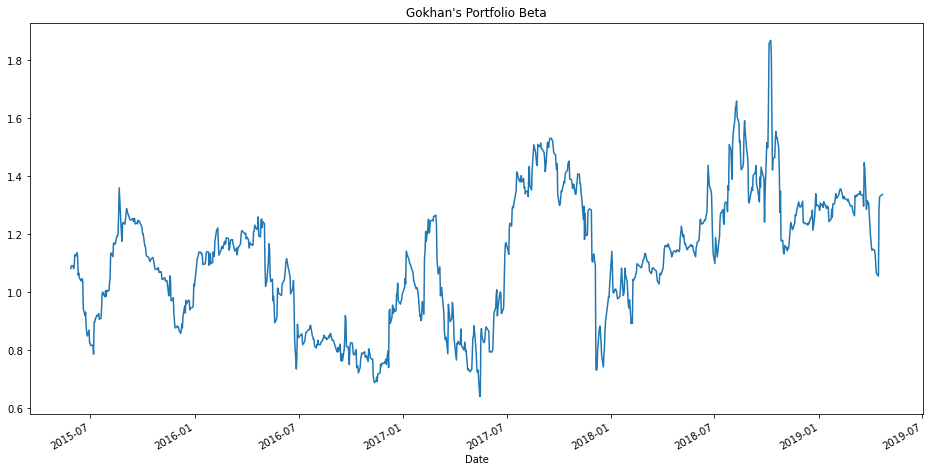

In [2050]:
# Calculate and plot Beta

gokhan_portfolio_covariance = combined_return_data_new["Gokhan's Portfolio"].rolling(window=60).cov(combined_return_data_new["SP500"])   #calculate my portfolio's covariance to use it in calculating beta

gokhan_portfolio_covariance = gokhan_portfolio_covariance.dropna()

gokhan_portfolio_covariance

sp500_variance = combined_return_data_new['SP500'].rolling(window=60).var()

gokhan_portfolio_beta = gokhan_portfolio_covariance / sp500_variance

gokhan_beta_plot = gokhan_portfolio_beta.plot(title="Gokhan's Portfolio Beta", figsize=(16,8))





### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [2051]:
# Calculate Annualized Sharpe Ratios
combined_return_data_new_sharpe = (combined_return_data_new.mean()*1041) / (combined_return_data_new.std() * np.sqrt(1041))

combined_return_data_new_sharpe = combined_return_data_new_sharpe.sort_values(ascending= False)

combined_return_data_new_sharpe



Algo 1                         2.793039
Gokhan's Portfolio             1.478797
SP500                          1.304097
BERKSHIRE HATHAWAY INC         1.249711
Algo 2                         0.988406
SOROS FUND MANAGEMENT LLC      0.702233
TIGER GLOBAL MANAGEMENT LLC   -0.263319
PAULSON & CO.INC.             -0.977537
dtype: float64

<AxesSubplot:title={'center':'Sharpe'}>

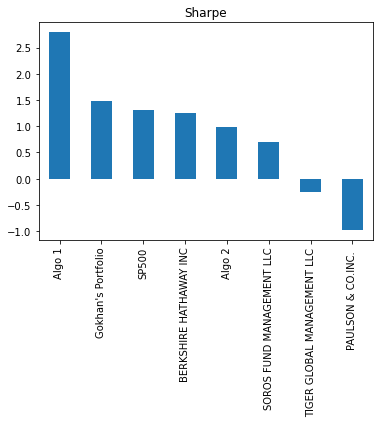

In [2052]:
# Visualize the sharpe ratios as a bar plot

combined_return_data_new_sharpe.plot(kind="bar", title="Sharpe")

### How does your portfolio do?

Write your answer here!

In [2053]:
#My portfoloio has a higher sharpe ratio than all of the portfolios except Algo 1. 
# Therefore, I can conclude that my portfolio performed better than Algo 2, SP500 and the rest of the portfolios, and was outperformed by Algo 1. 
